In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
pollution = pd.read_csv("Data/pollution_us_2000_2016.csv")
pollution.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [221]:
# We focus our study on the mean emission values

pollution_means = pollution[['Date Local','NO2 Mean','O3 Mean', 'SO2 Mean', 'CO Mean']]


In [222]:
# Preprocessing for date
# pollution_lite is the pollutant means with correctly formatted date

pollution_means['Date Local'] = pd.to_datetime(pollution_means['Date Local']) + pd.to_timedelta(7, unit='d')

pollution_lite = pollution_means.groupby([pd.Grouper(key='Date Local', freq='W-FRI')]).mean().reset_index().sort_values('Date Local')

for column in pollution_lite.columns:
    pollution_lite.rename(columns={column:column.split(" ")[0]},inplace=True)

pollution_lite["Date"] = pd.to_datetime(pollution_lite["Date"])

pollution_lite.head()


<ipython-input-222-a40f30753e12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pollution_means['Date Local'] = pd.to_datetime(pollution_means['Date Local']) + pd.to_timedelta(7, unit='d')


,Date,NO2,O3,SO2,CO
0,2000-01-14,22.844973,0.014593,3.496084,0.934330
1,2000-01-21,26.633827,0.012155,3.692432,1.089762
2,2000-01-28,23.185546,0.012174,3.676134,0.952091
3,2000-02-04,21.356254,0.013996,4.228662,0.866240
4,2000-02-11,24.057010,0.016922,4.152250,0.835509


In [223]:
# Extract just the year, month from pollution_lite (needed to be able to merge with consumption data)

pollution_lite_YM = pollution_lite
pollution_lite_YM['Date'] = pd.to_datetime(pollution_lite_YM['Date']).dt.strftime('%Y-%m')
pollution_lite_YM['Date'] = pd.to_datetime(pollution_lite_YM['Date'])
pollution_lite_YM

,Date,NO2,O3,SO2,CO
0,2000-01-01,22.844973,0.014593,3.496084,0.934330
1,2000-01-01,26.633827,0.012155,3.692432,1.089762
2,2000-01-01,23.185546,0.012174,3.676134,0.952091
3,2000-02-01,21.356254,0.013996,4.228662,0.866240
4,2000-02-01,24.057010,0.016922,4.152250,0.835509
...,...,...,...,...,...
852,2016-05-01,6.115688,0.031028,0.153498,0.219585
853,2016-05-01,5.999871,0.031133,0.154853,0.231743
854,2016-05-01,6.060569,0.031882,0.164542,0.207122
855,2016-06-01,6.418993,0.038210,0.280084,0.229610


In [224]:
# Dataframe used for merge

pollution_merge = pollution_lite_YM.groupby('Date').mean()
pollution_merge

,NO2,O3,SO2,CO
Date,,,,
2000-01-01,24.221449,0.012974,3.621550,0.992061
2000-02-01,22.157846,0.016659,3.829860,0.790996
2000-03-01,18.121255,0.024196,3.173465,0.569512
2000-04-01,16.148600,0.026943,3.233776,0.480455
2000-05-01,15.727008,0.032640,3.474802,0.440541
...,...,...,...,...
2016-02-01,11.652509,0.023750,0.811592,0.317098
2016-03-01,9.401936,0.027389,0.606865,0.275855
2016-04-01,8.217661,0.032326,0.622271,0.250487


### Consumption

In [239]:
consump = pd.read_csv("Data/MER_T01_03.csv")
consump

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLTCBUS,194913,11.980905,1,Coal Consumption,Quadrillion Btu
1,CLTCBUS,195013,12.347109,1,Coal Consumption,Quadrillion Btu
2,CLTCBUS,195113,12.552996,1,Coal Consumption,Quadrillion Btu
3,CLTCBUS,195213,11.306479,1,Coal Consumption,Quadrillion Btu
4,CLTCBUS,195313,11.372684,1,Coal Consumption,Quadrillion Btu
...,...,...,...,...,...,...
8095,TETCBUS,202210,7.810656,12,Total Primary Energy Consumption,Quadrillion Btu
8096,TETCBUS,202211,8.283482,12,Total Primary Energy Consumption,Quadrillion Btu
8097,TETCBUS,202212,9.075842,12,Total Primary Energy Consumption,Quadrillion Btu
8098,TETCBUS,202213,100.409412,12,Total Primary Energy Consumption,Quadrillion Btu


In [226]:
list(consump['Description'].unique())

['Coal Consumption',
 'Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)',
 'Petroleum Consumption (Excluding Biofuels)',
 'Total Fossil Fuels Consumption',
 'Nuclear Electric Power Consumption',
 'Hydroelectric Power Consumption',
 'Geothermal Energy Consumption',
 'Solar Energy Consumption',
 'Wind Energy Consumption',
 'Biomass Energy Consumption',
 'Total Renewable Energy Consumption',
 'Total Primary Energy Consumption']

In [227]:
# Data preprocessing and date formatting

consump["YYYYMM"]=consump["YYYYMM"].values.astype(str)

months = []
years = []
for index, row in consump.iterrows():
    months.append(row["YYYYMM"][4:])
    years.append(row["YYYYMM"][:4])

consump = consump.assign(Year=years)
consump = consump.assign(Month=months)

consump = consump[consump['Value'] != 'Not Available']
consump = consump[consump['Month'] != '13']

consump['YYYYMM'] = pd.to_datetime([f'{y}-{m}-01' for y, m in zip(consump.Year, consump.Month)])
consump = consump.rename(columns={"YYYYMM":"Date"})

consump

,MSN,Date,Value,Column_Order,Description,Unit,Year,Month
24,CLTCBUS,1973-01-01,1.166191,1,Coal Consumption,Quadrillion Btu,1973,01
25,CLTCBUS,1973-02-01,1.050588,1,Coal Consumption,Quadrillion Btu,1973,02
26,CLTCBUS,1973-03-01,1.046856,1,Coal Consumption,Quadrillion Btu,1973,03
27,CLTCBUS,1973-04-01,0.998979,1,Coal Consumption,Quadrillion Btu,1973,04
28,CLTCBUS,1973-05-01,1.014502,1,Coal Consumption,Quadrillion Btu,1973,05
...,...,...,...,...,...,...,...,...
8094,TETCBUS,2022-09-01,7.782286,12,Total Primary Energy Consumption,Quadrillion Btu,2022,09
8095,TETCBUS,2022-10-01,7.810656,12,Total Primary Energy Consumption,Quadrillion Btu,2022,10
8096,TETCBUS,2022-11-01,8.283482,12,Total Primary Energy Consumption,Quadrillion Btu,2022,11
8097,TETCBUS,2022-12-01,9.075842,12,Total Primary Energy Consumption,Quadrillion Btu,2022,12


In [228]:
# Used to format result r and p vakues into readable forms

def format_e(n):
    return "{:.2e}".format(n)

In [232]:
# Create dataframe to hold correlation values

data = pd.DataFrame({'Pollutant': ['NO2', 'O3', 'SO2', 'CO']})
data

,Pollutant
0,NO2
1,O3
2,SO2
3,CO


In [233]:
from scipy.stats import pearsonr

descrips = list(consump['Description'].unique()) # All the different energy types
significant_corrs = [] # 

#for each energy type
for i in range(len(descrips)):
    name = str(descrips[i])

    # Merge data on date for this energy type
    consump_merge = consump.loc[consump['Description'] == descrips[i]]
    consump_pollution = pollution_merge.merge(consump_merge,how='inner',on='Date').dropna()
    consump_pollution["Value"] = consump_pollution.Value.astype(float)

    corrs = [] #holds all correlation and p-value pairs for this energy type

    # For each of the pollutants
    for j in range(1,5):

        # Collect the r and p values
        r, p = pearsonr(consump_pollution['Value'], consump_pollution[consump_pollution.columns[j]])
        corrs.append(format_e(r))

        # If there is a significant, strong correlation, print out 
        if(p <= 0.05 and (r >= 0.70 or r<= -0.7)):
            print(descrips[i] + ' with ' + str(consump_pollution.columns[j]) + ': ' + str(r))

    # Add correlations for this energy type to dataframe
    data[name] = corrs


Petroleum Consumption (Excluding Biofuels) with SO2: 0.7013737212945529
Geothermal Energy Consumption with SO2: -0.8816982888855941
Solar Energy Consumption with SO2: -0.7043608904225946
Wind Energy Consumption with SO2: -0.8826697348149057
Biomass Energy Consumption with SO2: -0.921346073964264
Total Renewable Energy Consumption with SO2: -0.8955692350299358


In [234]:
data


,Pollutant,Coal Consumption,Natural Gas Consumption (Excluding Supplemental Gaseous Fuels),Petroleum Consumption (Excluding Biofuels),Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Hydroelectric Power Consumption,Geothermal Energy Consumption,Solar Energy Consumption,Wind Energy Consumption,Biomass Energy Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption
0,NO2,4.07e-01,3.59e-01,3.65e-01,6.44e-01,-1.29e-01,-1.50e-01,-6.13e-01,-6.09e-01,-5.76e-01,-6.65e-01,-6.75e-01,4.48e-01
1,O3,-1.30e-01,-6.33e-01,-1.84e-02,-5.83e-01,-7.41e-02,3.60e-01,1.10e-01,3.06e-01,1.31e-01,1.42e-01,2.52e-01,-5.23e-01
2,SO2,6.96e-01,-1.51e-01,7.01e-01,5.15e-01,-1.19e-01,1.71e-02,-8.82e-01,-7.04e-01,-8.83e-01,-9.21e-01,-8.96e-01,2.60e-01
3,CO,3.84e-01,3.54e-01,3.44e-01,6.20e-01,-7.22e-02,-8.43e-02,-5.69e-01,-5.07e-01,-5.40e-01,-6.14e-01,-6.07e-01,4.48e-01


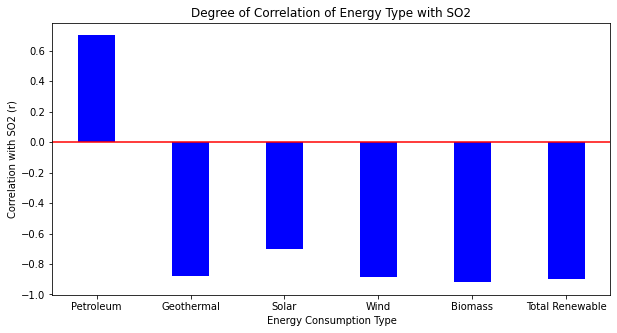

In [235]:
# Plot significant correlations

fig = plt.figure(figsize = (10, 5))
 
energy_types = ['Petroleum', 'Geothermal', 'Solar', 'Wind', 'Biomass', 'Total Renewable']
correlation_val = [0.7013737212945529, -0.8816982888855941, -0.7043608904225946, -0.8826697348149057, -0.921346073964264, -0.8955692350299358]

plt.bar(energy_types, correlation_val, color ='blue', width = 0.4)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Energy Consumption Type")
plt.ylabel("Correlation with SO2 (r)")
plt.title("Degree of Correlation of Energy Type with SO2")
plt.show()


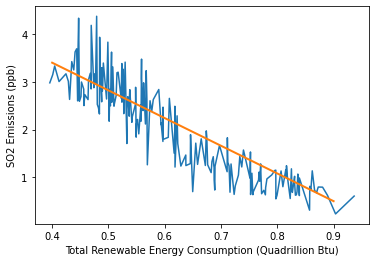

In [236]:
# Create line graphs for Total Renewable and Petroleum types

renewable_consump = consump.loc[consump['Description'] == 'Total Renewable Energy Consumption']
renewable_SO2_compare = pollution_merge.merge(renewable_consump,how='inner',on='Date').dropna()
renewable_SO2_compare["Value"] = renewable_SO2_compare.Value.astype(float)

ax = sns.lineplot(data=renewable_SO2_compare, x='Value',y='SO2')
plt.plot([0.4, 0.9], [3.4, 0.5], linewidth=2)
ax.set(xlabel='Total Renewable Energy Consumption (Quadrillion Btu)', ylabel='SO2 Emissions (ppb)')
plt.show()

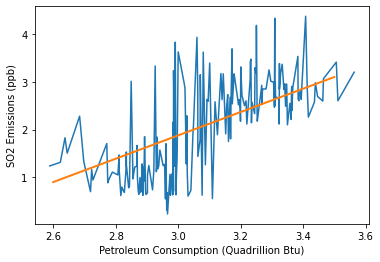

In [237]:
petrol_consump = consump.loc[consump['Description'] == 'Petroleum Consumption (Excluding Biofuels)']
petrol_SO2_compare = pollution_merge.merge(petrol_consump,how='inner',on='Date').dropna()
petrol_SO2_compare["Value"] = petrol_SO2_compare.Value.astype(float)

ax = sns.lineplot(data=petrol_SO2_compare, x='Value',y='SO2')
plt.plot([2.6, 3.5], [0.9, 3.1], linewidth=2)
ax.set(xlabel='Petroleum Consumption (Quadrillion Btu)', ylabel='SO2 Emissions (ppb)')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


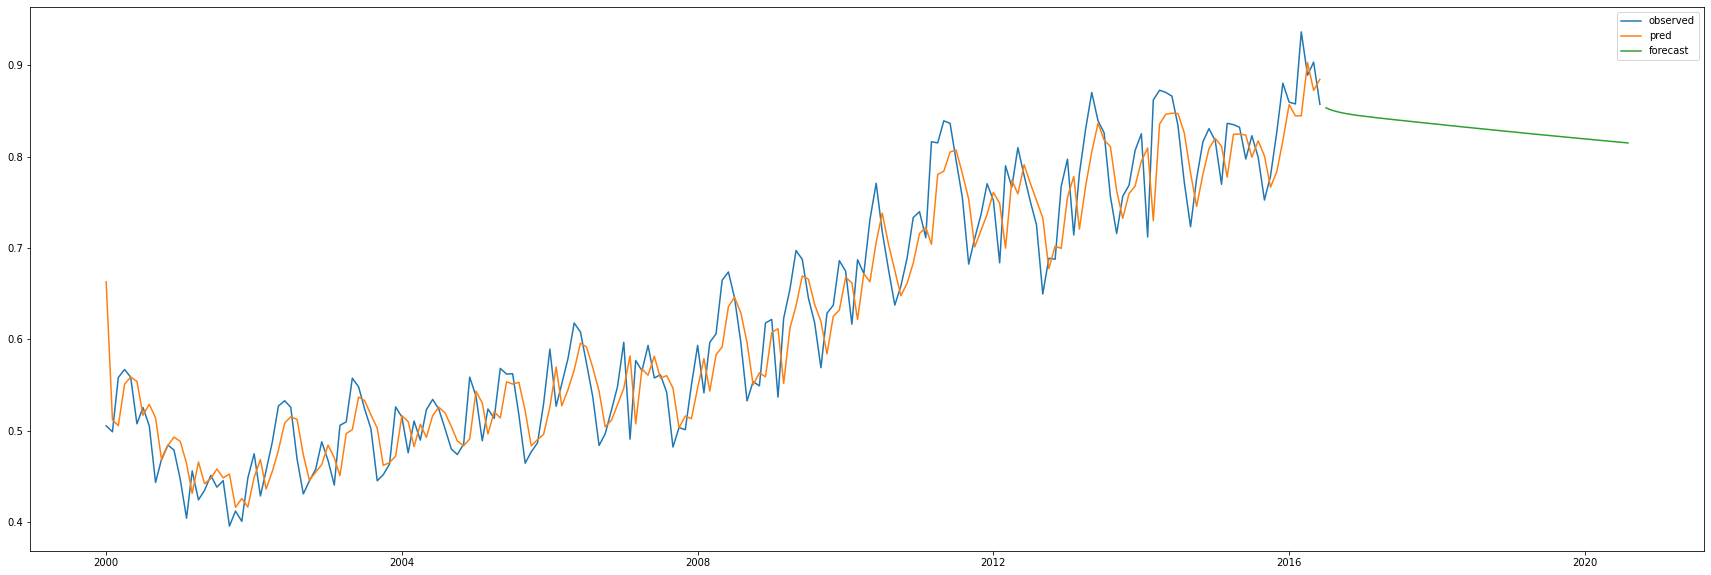

In [238]:
# Forcasting Total Renewable energy Consumption 

from statsmodels.tsa.arima.model import ARIMA

total_renewable = renewable_SO2_compare[['Date', 'Value']]
total_renewable = total_renewable.set_index('Date').sort_index() # makes sure years are in order

model = ARIMA(total_renewable, order=(2, 0, 1)).fit()
y_pred = model.predict()

arima_forecast = model.forecast(50, return_conf_interval=True)

fig, ax = plt.subplots(figsize=(30,10)) 
ax.plot(total_renewable, label='observed')
ax.plot(y_pred, label='pred')
ax.plot(arima_forecast, label='forecast')
ax.legend()